In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/g-research-crypto-forecasting/example_sample_submission.csv
/kaggle/input/g-research-crypto-forecasting/asset_details.csv
/kaggle/input/g-research-crypto-forecasting/example_test.csv
/kaggle/input/g-research-crypto-forecasting/train.csv
/kaggle/input/g-research-crypto-forecasting/supplemental_train.csv
/kaggle/input/g-research-crypto-forecasting/gresearch_crypto/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/g-research-crypto-forecasting/gresearch_crypto/__init__.py


# **DATA PRE-PROCESSING**

We take this space to try and summarise and describe the data so that we could figure out some or the other relationship (before visualization)

In [2]:
data1 = pd.read_csv("/kaggle/input/g-research-crypto-forecasting/supplemental_train.csv")
data1.head(5)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1623542400,3,1201.0,1.478556,1.48603,1.47800,1.483681,654799.561103,1.481439,-0.002594
1,1623542400,2,1020.0,580.306667,583.89000,579.91000,582.276667,1227.988328,581.697038,-0.009143
2,1623542400,0,626.0,343.789500,345.10800,343.64000,344.598000,1718.832569,344.441729,-0.004525
3,1623542400,1,2888.0,35554.289632,35652.46465,35502.67000,35602.004286,163.811537,35583.469303,0.003096
4,1623542400,4,433.0,0.312167,0.31260,0.31192,0.312208,585577.410442,0.312154,0.001426


In [3]:
data1.describe()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
count,2.015112e+06,2.015112e+06,2.015112e+06,2.015112e+06,2.015112e+06,2.015112e+06,2.015112e+06,2.015112e+06,2.015112e+06,2.013377e+06
mean,1.627863e+09,6.499139e+00,5.163656e+02,3.408915e+03,3.412519e+03,3.405373e+03,3.408919e+03,3.386617e+05,3.408879e+03,2.409469e-06
std,2.494254e+06,4.031342e+00,1.060273e+03,1.052321e+04,1.053392e+04,1.051262e+04,1.052323e+04,1.387742e+06,1.052310e+04,4.333439e-03
min,1.623542e+09,0.000000e+00,1.000000e+00,4.652540e-02,4.695000e-02,4.637000e-02,4.652140e-02,9.610000e-06,4.654178e-02,-7.880525e-02
25%,1.625702e+09,3.000000e+00,8.200000e+01,9.160500e-01,9.381000e-01,8.970000e-01,9.160000e-01,1.457512e+02,9.159005e-01,-1.380767e-03
50%,1.627864e+09,6.000000e+00,2.010000e+02,7.554037e+01,7.578950e+01,7.535660e+01,7.553027e+01,1.352555e+03,7.553674e+01,-6.469021e-05
75%,1.630023e+09,1.000000e+01,5.390000e+02,5.637334e+02,5.642800e+02,5.631500e+02,5.637578e+02,1.021959e+05,5.637045e+02,1.251661e-03
max,1.632182e+09,1.300000e+01,8.747800e+04,5.288442e+04,5.295647e+04,5.285604e+04,5.288209e+04,1.261933e+08,5.289832e+04,2.112271e-01


# **FEATURE ENGINEERING**


In [4]:

data1['Spread'] = data1['High'] - data1['Low']
data1.head(5)

# For DOGECOIN, anyone can say anything to kick the prices (Source : Twitter)


,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Spread
0,1623542400,3,1201.0,1.478556,1.48603,1.47800,1.483681,654799.561103,1.481439,-0.002594,0.00803
1,1623542400,2,1020.0,580.306667,583.89000,579.91000,582.276667,1227.988328,581.697038,-0.009143,3.98000
2,1623542400,0,626.0,343.789500,345.10800,343.64000,344.598000,1718.832569,344.441729,-0.004525,1.46800
3,1623542400,1,2888.0,35554.289632,35652.46465,35502.67000,35602.004286,163.811537,35583.469303,0.003096,149.79465
4,1623542400,4,433.0,0.312167,0.31260,0.31192,0.312208,585577.410442,0.312154,0.001426,0.00068


# **DATA VISUALIZATION**

We show 

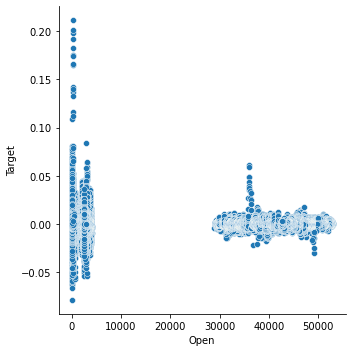

In [5]:
import seaborn as sns
sns.relplot(x="Open", y="Target", data=data1);
# Account for incomplete data

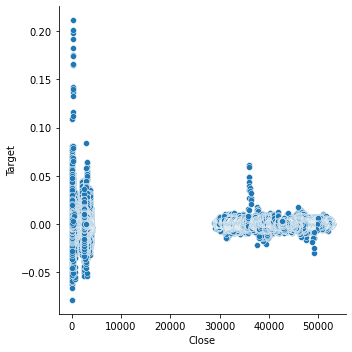

In [6]:
sns.relplot(x="Close", y="Target", data=data1);
# This tells me that Open and Close do not correlate/ correlate similarly to target and hence are not the perfect parameters 

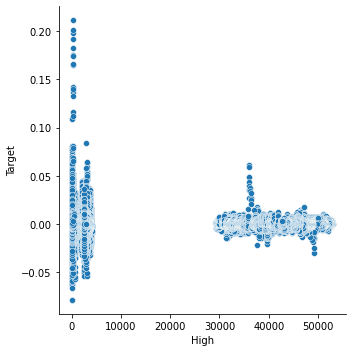

In [7]:
sns.relplot(x="High", y="Target", data=data1);

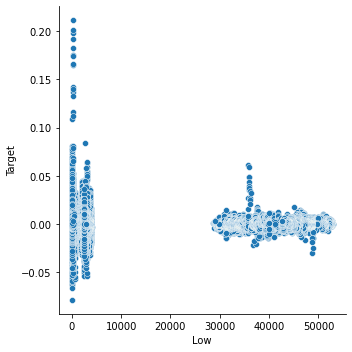

In [8]:
sns.relplot(x="Low", y="Target", data=data1);
# This tells me that High and Low do not correlate/ correlate similarly to target and hence are not the perfect parameters 

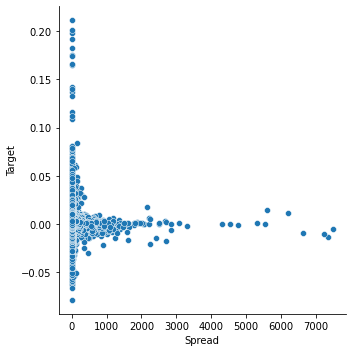

In [9]:
sns.relplot(x="Spread", y="Target", data=data1); # Engineering feature Spread = High - Low
# Does show correlation 

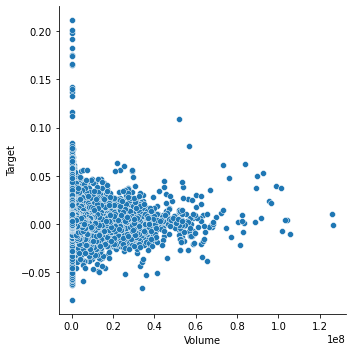

In [10]:
sns.relplot(x="Volume", y="Target", data=data1);
# Lesser volume = more variability and more volume = specific variability

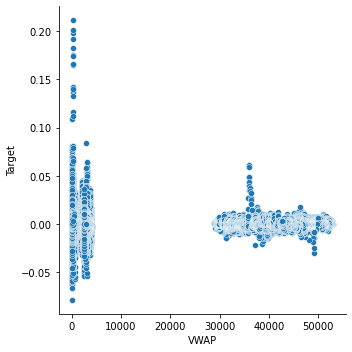

In [11]:
sns.relplot(x="VWAP", y="Target", data=data1);
# no correlation/similar correlation